In [30]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

# Set directory
os.chdir('Greywater_Metagemonics/Greywater_Data')

In [29]:
import sklearn
sklearn.__version__

'0.22.1'

In [14]:
!pip install numpy==1.21.5

  Using cached numpy-1.21.5-cp37-cp37m-macosx_10_9_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5


In [6]:
print(np.__version__)

1.21.5


In [15]:
!pip install pandas==1.0.5

     |████████████████████████████████| 10.0 MB 10.0 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1


In [13]:
print(pd.__version__)

1.0.1


## Perform PCA

In [66]:
#data = pd.read_csv('taxonomy/metaxa2_genera_relab_filtered01.csv', delimiter=',', index_col=0)
data = pd.read_csv('ARGs/RGI/ARO_rpkm_summary_strict.csv', index_col=0)
#data = pd.read_csv('ARGs/contig-RGI/metaspades/ARO_count_summary_strict.csv', index_col = 0).drop(columns=['AMR Gene Family', 'Drug Class', 'Resistance Mechanism'])
# if data has sample ID as column names, need to transpose

#For RPKM_house_x_xxx column name:
#rename = {}
#for name in list(data.columns):
#    new_name = name.strip("RPKM_")
#    rename[name] = new_name
#data = data.rename(columns=rename)

data = data.transpose()

# transform data to unit scale (mean=0 and variance=1)
features = list(data.columns)
data_value = data.loc[:, features].values
data_value = StandardScaler().fit_transform(data_value)

# Perform PCA 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_value)
pca_df = pd.DataFrame(data = data_pca, 
         columns = ['principal component 1', 'principal component 2'])

# get sample name list
sample = list(data.index)
house = []
treatment = []
#ID = []
for s in sample: 
    s_cut = s.split("_")
    house.append("_".join(s_cut[0:2]))
    treatment.append(s_cut[2])
    #ID.append("_".join(s_cut[1:]))
print(house)
print(treatment)

#pca_df["sample"] = ID
pca_df["sample"] = sample
pca_df["House"] = house
pca_df["Treatment"] = treatment
pca_df

['house_1', 'house_1', 'house_2', 'house_2', 'house_3', 'house_3', 'house_4', 'house_4', 'house_5', 'house_5']
['raw', 'treat', 'raw', 'treat', 'raw', 'treat', 'raw', 'treat', 'raw', 'treat']


,principal component 1,principal component 2,sample,House,Treatment
0,12.017155,5.784112,house_1_raw,house_1,raw
1,-0.178212,-2.011503,house_1_treat,house_1,treat
2,-1.416824,-1.126648,house_2_raw,house_2,raw
3,-0.398936,-1.820790,house_2_treat,house_2,treat
4,-0.324353,-2.629107,house_3_raw,house_3,raw
5,-0.461790,-1.838343,house_3_treat,house_3,treat
6,-0.755491,-3.190733,house_4_raw,house_4,raw
7,-0.393739,-2.139378,house_4_treat,house_4,treat
8,-7.416313,10.544302,house_5_raw,house_5,raw
9,-0.671498,-1.571913,house_5_treat,house_5,treat


In [67]:
pca.explained_variance_ratio_

array([0.2183948 , 0.19439714])

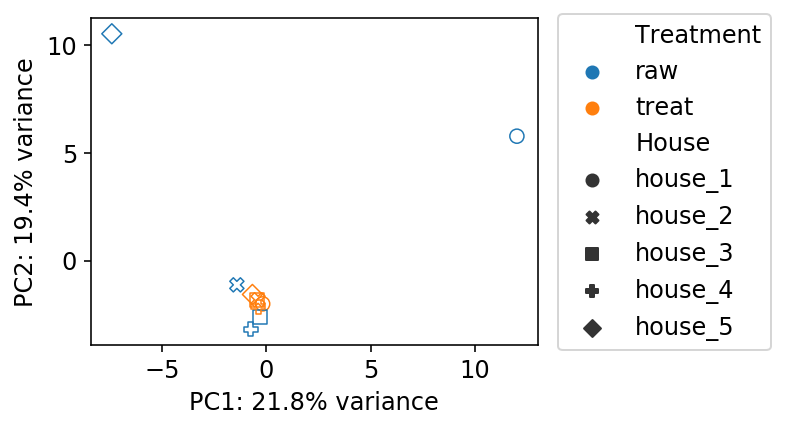

In [68]:
plt.rcParams['figure.figsize'] = [4, 3]
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
ax4 = sns.scatterplot(x="principal component 1", y="principal component 2", 
                data=pca_df, hue = "Treatment", style = "House", s = 50, ec=['tab:blue','tab:orange'],fc='none')
                      #markers=['1','2','3','+','x'])
ax4.legend(bbox_to_anchor=(1.02, 1.05), fontsize=12)
plt.xlabel("PC1: 21.8% variance", fontsize=12)
plt.ylabel("PC2: 19.4% variance", fontsize=12)
#plt.title("Genus level taxonomy (metaxa2)")
#plt.title("ARG identified from assemblies")

plt.savefig('ARGs/figures/PCA_RGImain_strict_hollow.pdf',bbox_inches='tight')
#plt.savefig('taxonomy/figures/metaxa2_genus_PCA_hollow.pdf', bbox_inches='tight')